# Decision Tree – Supervised Learning

- This notebook explains the Decision Tree algorithm as part of my machine learning learning journey. It covers theory, reasoning,model building, and interpretability with a small dataset.


### What is a Decision Tree?

## Decision Tree

- A Decision Tree is a supervised machine learning algorithm used for both 
classification and regression tasks.  
- It makes decisions by splitting data using simple if–else rules based on feature values.


### How Decision Tree works

- Decision Trees work by recursively splitting the dataset into smaller subsets.
- At each node, the algorithm selects the feature and threshold that produces the purest child nodes using a split criterion such as Gini or Entropy.


### Important Terminologies

#### Decision Tree Terminology

- Root Node: First split in the tree
- Decision Node: Internal node that performs a split
- Leaf Node: Final output node (prediction)
- Depth: Maximum levels in the tree
- Branch: Outcome of a split

### Types of Decision Trees

- Classification Tree: Used when target variable is categorical
- Regression Tree: Used when target variable is continuous

### Splitting Criteria

### Decision Trees use the following criteria to select the best split:

- Gini Index (used in CART)
- Entropy
- Information Gain
- Gain Ratio (used in C4.5)
- Variance Reduction (Regression Trees)

### Why Decision Trees do NOT need feature scaling

## Preprocessing for Decision Trees
- Feature scaling is NOT required because Decision Trees use threshold-based splits.
- Normalization and standardization are unnecessary.
- Categorical features must be encoded (Label Encoding preferred).


### Overfitting in Decision Trees

#### Decision Trees are prone to overfitting when allowed to grow deep.
This can be controlled using:
- max_depth
- min_samples_split
- min_samples_leaf
- Pruning


#### Advantages & Limitations

#### Advantages
- Easy to understand and interpret
- Works with both numerical and categorical data
- No feature scaling required

#### Limitations
- Prone to overfitting
- Sensitive to small data changes
- Lower performance compared to ensemble methods


In [1]:
%%writefile data.csv
cost,spicy,target
50,4,1
50,7,-1
50,9,1
75,2,1
100,3,1
150,1,1
150,3,1
150,6,-1
150,10,1
225,9,1
250,1,-1
250,4,1
250,7,-1
300,4.5,1
300,6,-1
300,9,1
350,2,-1
350,3,1
400,8,-1
425,4,1
450,1,-1
450,7,-1
475,3.5,1
500,9,-1

Writing data.csv


In [5]:
import pandas as pd
data = pd.read_csv(r"C:\Users\sande\Downloads\data.xls")
data.shape

(24, 3)

In [6]:
data.head()

,cost,spicy,target
0,50,4.0,1
1,50,7.0,-1
2,50,9.0,1
3,75,2.0,1
4,100,3.0,1


In [16]:
X = data.drop('target', axis = 1)
y = data['target']
X.shape, y.shape

((24, 2), (24,))

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
dt = DecisionTreeClassifier()
dt

DecisionTreeClassifier()

In [19]:
dt.fit(X, y)

DecisionTreeClassifier()

In [20]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

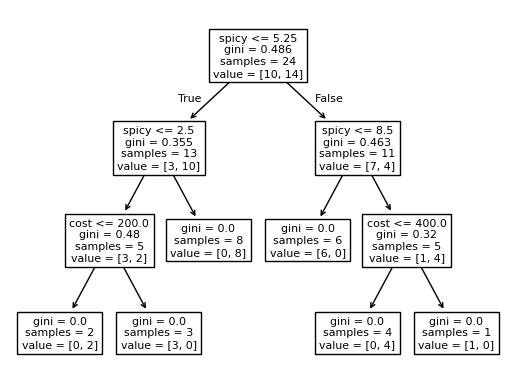

In [21]:
plot_tree(dt, feature_names = X.columns)
plt.show()

In [15]:
from sklearn.tree import export_text

In [22]:
print(export_text(dt))

|--- feature_1 <= 5.25
|   |--- feature_1 <= 2.50
|   |   |--- feature_0 <= 200.00
|   |   |   |--- class: 1
|   |   |--- feature_0 >  200.00
|   |   |   |--- class: -1
|   |--- feature_1 >  2.50
|   |   |--- class: 1
|--- feature_1 >  5.25
|   |--- feature_1 <= 8.50
|   |   |--- class: -1
|   |--- feature_1 >  8.50
|   |   |--- feature_0 <= 400.00
|   |   |   |--- class: 1
|   |   |--- feature_0 >  400.00
|   |   |   |--- class: -1



In [24]:
import seaborn as sns

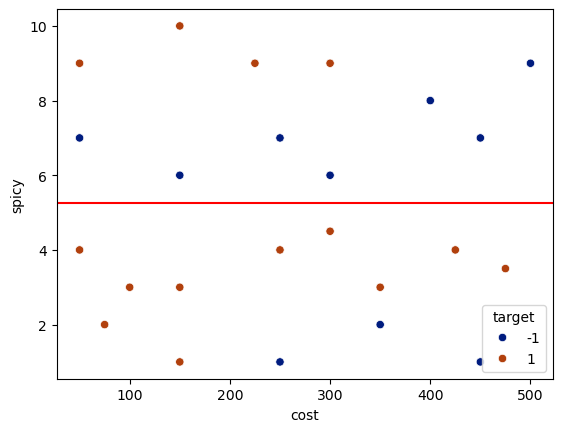

In [25]:
sns.scatterplot(data = data, x = 'cost', y = 'spicy', hue = 'target', palette = 'dark')
plt.axhline(y = 5.25, color = 'r', label = 'root')

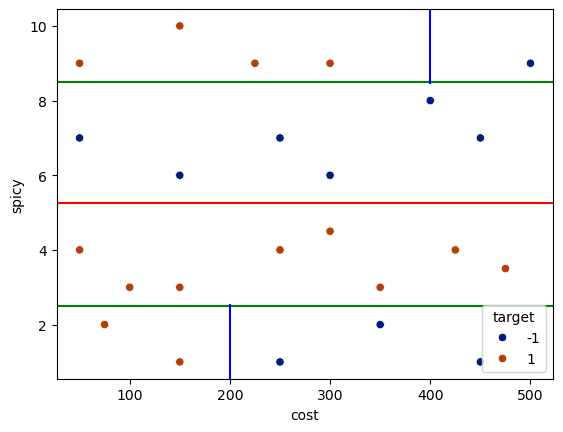

In [27]:
sns.scatterplot(data = data, x = 'cost', y = 'spicy', hue = 'target', palette = 'dark')
plt.axhline(y = 5.25, color = 'r', label = 'root')
plt.axhline(y = 2.5, color = 'g', label = 'level1')
plt.axhline(y = 8.5, color = 'g', label = 'level1')
plt.axvline(x = 200, ymin = 0, ymax = 0.2, color = 'b', label = 'level2')
plt.axvline(x = 400, ymin = 0.8, ymax = 1, color = 'b', label = 'level2')